In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [27]:
src = "../../../data/inference"
dst = "../../../plots"

In [9]:
fname = "inferred_data.csv.gzip"
tweets = pd.read_csv(
    Path(src, fname), 
    compression="gzip", 
    parse_dates=["created_at"],
    low_memory=False
)

# Descriptive stats

In [10]:
tweets.head(2)

,created_at,root_account,tree_id,tweet_id,tree_nr,hate_score,counter_score,in_reply_to,TOXICITY,tweet_nr,...,group_human_label_confident,goal_human_label_confident,target_human_label_confident,hate_human_label_confident,strategy_human_label,group_human_label,goal_human_label,hate_human_label,target_human_label,labelling_batch
0,2013-01-01 01:26:01+00:00,tagesschau,285919774381330432,285919774381330432,0,0.320060,0.679940,None,0.124635,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 04:54:32+00:00,tagesschau,285919774381330432,285972249540964353,0,0.156157,0.843843,285919774381330432,0.312076,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
len(tweets)

1317230

In [13]:
len(tweets["tree_id"].unique())

178309

In [14]:
len(tweets["root_account"].unique())

22

In [15]:
tweets["created_at"].min()

Timestamp('2013-01-01 01:26:01+0000', tz='UTC')

In [16]:
tweets["created_at"].max()

Timestamp('2019-02-06 06:42:42+0000', tz='UTC')

# Human labelling

In [22]:
batches = {f"batch_{i}":tweets[tweets["labelling_batch"] == i].copy() for \
           i in range(1, int(tweets["labelling_batch"].max()) + 1)}

In [24]:
def get_counts(counts, order):
    tmp = []
    for entry in order:
        try:
            c = counts.loc[entry]
        except KeyError:
            c = 0
        tmp.append(c)
    return np.asarray(tmp)

In [25]:
order = ["opin", "sarc", 
         "info", "quest", "conseq", "inconsist", "correct",
         "insult-polit", "insult-pers", "insult-inst", "insult-ism",
         "unint", "other", "foreign"]

counts_1 = get_counts(batches["batch_1"]["strategy_human_label"].value_counts(), order)

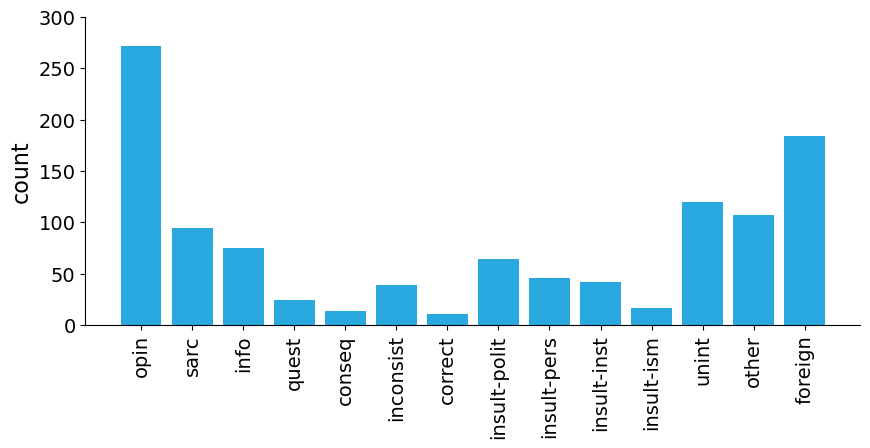

In [29]:
fname = "strategy_category_distribution_batch1.svg"
fig, ax = plt.subplots(figsize=(10, 4))
twitterblue = (42/255, 169/255, 224/255)
ax.bar(range(len(order)), counts_1, color=twitterblue)
ax.set_xticks(range(len(counts_1)))
ax.set_xticklabels(order, rotation=90, fontsize=14)
ax.set_ylabel("count", fontsize=16)
ax.set_ylim(0, 300)
ax.set_yticks(range(0, 301, 50))
ax.set_yticklabels(range(0, 301, 50), fontsize=14)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(Path(dst, fname))

In [30]:
strategy_label_map = {
    "opin":"opin",
    "sarc":"sarc",
    "info":"construct",
    "quest":"construct",
    "conseq":"construct",
    "inconsist":"construct",
    "correct":"construct",
    "insult-polit":"leave fact",
    "insult-pers":"leave fact",
    "insult-inst":"leave fact",
    "insult-ism":"leave fact",
    "unint":"other",
    "other":"other",
    "foreign":"other"
}

for batch in batches.keys():
    batches[batch]["strategy_human_label_condensed"] = batches[batch]["strategy_human_label"].replace(strategy_label_map)


In [35]:
order_condensed = ["opin", "sarc", "construct", "leave fact", "other"]
labels_condensed = ["opinion", "sarcasm", "constructive\ncomments", "leaving factual\ndiscussion", "other"]

counts_1_condensed = get_counts(batches["batch_1"]["strategy_human_label_condensed"].value_counts(), order_condensed)

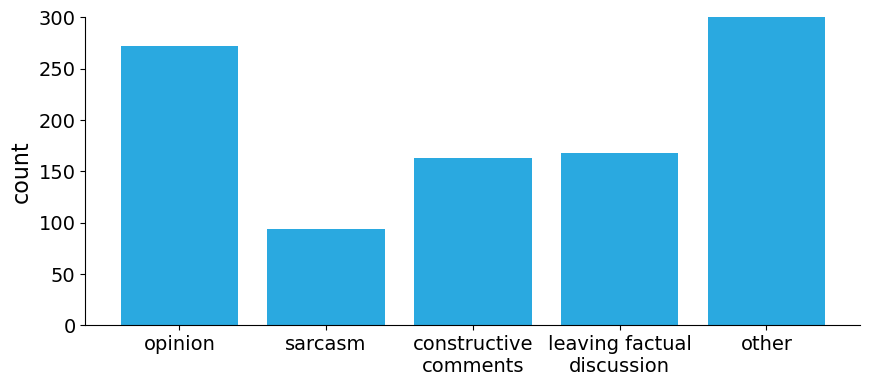

In [36]:
fname = "strategy_category_distribution_batch1_condensed.svg"
fig, ax = plt.subplots(figsize=(10, 4))
twitterblue = (42/255, 169/255, 224/255)
ax.bar(range(len(order_condensed)), counts_1_condensed, color=twitterblue)
ax.set_xticks(range(len(counts_1_condensed)))
ax.set_xticklabels(labels_condensed, fontsize=14)
ax.set_ylabel("count", fontsize=16)
ax.set_ylim(0, 300)
ax.set_yticks(range(0, 301, 50))
ax.set_yticklabels(range(0, 301, 50), fontsize=14)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(Path(dst, fname), bbox_inches="tight")

In [37]:
counts_3_condensed = get_counts(batches["batch_3"]["strategy_human_label_condensed"].value_counts(), order_condensed)
counts_4_condensed = get_counts(batches["batch_4"]["strategy_human_label_condensed"].value_counts(), order_condensed)
counts_5_condensed = get_counts(batches["batch_5"]["strategy_human_label_condensed"].value_counts(), order_condensed)
counts_6_condensed = get_counts(batches["batch_6"]["strategy_human_label_condensed"].value_counts(), order_condensed)

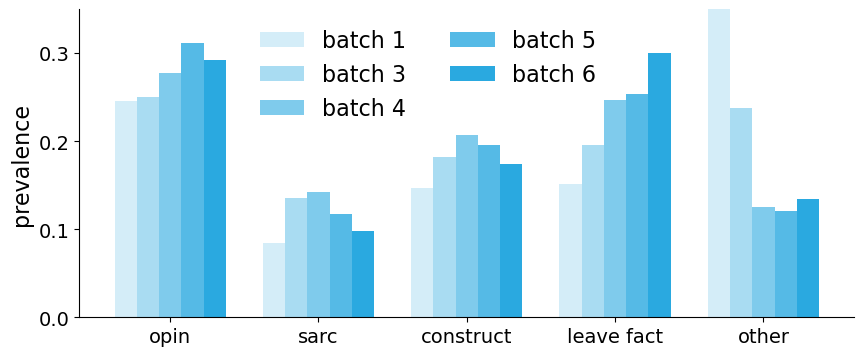

In [41]:
fname = "strategy_category_distribution_condensed.svg"
fig, ax = plt.subplots(figsize=(10, 4))
twitterblue = (42/255, 169/255, 224/255)
x = np.asarray(range(len(order_condensed)))
ax.bar(x, counts_1_condensed / len(batches["batch_1"]),
       width=0.15, 
       color=twitterblue, 
       alpha=0.2,
       label="batch 1")
ax.bar(x + 0.15, counts_3_condensed  / len(batches["batch_3"]),
       width=0.15, 
       color=twitterblue, 
       alpha=0.4,
       label="batch 3")
ax.bar(x + 0.3, counts_4_condensed / len(batches["batch_4"]),
       width=0.15, 
       color=twitterblue, 
       alpha=0.6,
       label="batch 4")
ax.bar(x + 0.45, counts_5_condensed / len(batches["batch_5"]),
       width=0.15, 
       color=twitterblue, 
       alpha=0.8,
       label="batch 5")
ax.bar(x + 0.6, counts_6_condensed / len(batches["batch_6"]),
       width=0.15, 
       color=twitterblue, 
       alpha=1,
       label="batch 6")

ax.set_xticks(x + 0.3)
ax.set_xticklabels(order_condensed, fontsize=14)
ax.set_ylabel("prevalence", fontsize=16)
ax.set_ylim(0, 0.35)
ax.set_yticks(np.arange(0, 0.31, 0.1))
ax.set_yticklabels([0.0, 0.1, 0.2, 0.3], fontsize=14)
ax.legend(frameon=False, fontsize=16, loc=9, ncol=2,
          bbox_to_anchor=[0.45, 1, 0, 0])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.savefig(Path(dst, fname), bbox_inches="tight")

# Hate/counter strategies

In [42]:
subset = tweets.dropna(subset=["labelling_batch"]).copy()

In [44]:
strategy_label_map = {
    "opin":"opin",
    "sarc":"sarc",
    "info":"construct",
    "quest":"construct",
    "conseq":"construct",
    "inconsist":"construct",
    "correct":"construct",
    "insult-polit":"leave fact",
    "insult-pers":"leave fact",
    "insult-inst":"leave fact",
    "insult-ism":"leave fact",
    "unint":"other",
    "other":"other",
    "foreign":"other"
}

subset["strategy_human_label"] = subset["strategy_human_label"].replace(strategy_label_map)
strategy_counts = subset[subset["hate_human_label"].isin(["yes", "no"])]\
    [["hate_human_label", "strategy_human_label", "tweet_id"]]\
    .groupby(["hate_human_label", "strategy_human_label"])\
    .count()\
    .reset_index()\
    .rename(columns={"tweet_id":"count"})
strategy_counts["hate_human_label"] = strategy_counts["hate_human_label"]\
    .replace({"yes":"hatespeech", "no":"not hatespeech"})

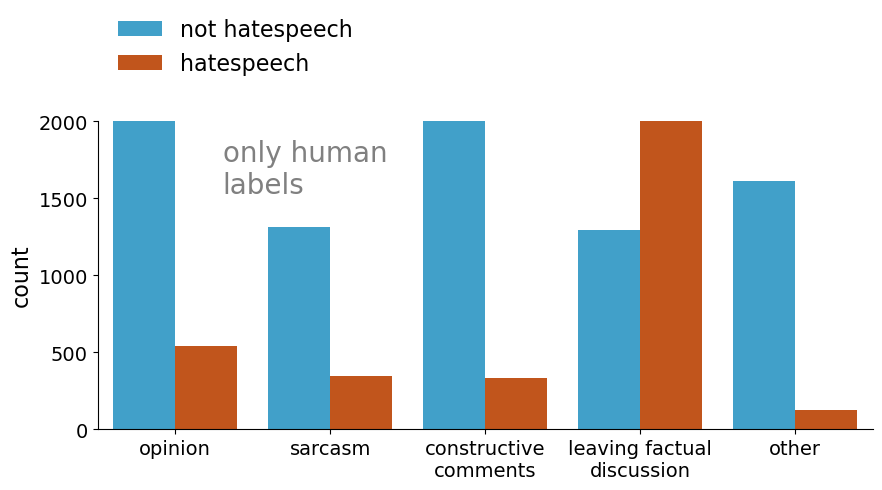

In [46]:
fname = "strategy_category_distribution_hate.svg"
fig, ax = plt.subplots(figsize=(10, 4))
hatered = (220/255, 76/255, 0)
order_condensed = ["opin", "sarc", "construct", "leave fact", "other"]
sns.barplot(
    ax=ax,
    x="strategy_human_label",
    y="count",
    hue="hate_human_label",
    hue_order=["not hatespeech", "hatespeech"],
    order=order_condensed,
    palette=[twitterblue, hatered],
    data=strategy_counts
)
ax.legend(frameon=False, fontsize=16, loc=2, bbox_to_anchor=[0, 1.4, 0, 0])
ax.set_xlabel("")
ax.set_ylim(0, 2000)
ax.set_yticks([0, 500, 1000, 1500, 2000])
ax.set_yticklabels([0, 500, 1000, 1500, 2000], fontsize=14)
ax.set_xticklabels(labels_condensed, fontsize=14)
ax.set_ylabel("count", fontsize=16)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.text(0.25, 0.7, "only human\nlabels", fontsize=20, color="grey")
plt.savefig(Path(dst, fname), bbox_inches="tight")

# Label prevalence

In [47]:
def create_combined_label(row):
    combined_label = row["hate"] + "-" +\
                     row["strategy"] + "-" +\
                     row["group"] + "-" +\
                     row["goal"] + "-" +\
                     row["target"]
    return combined_label

In [58]:
dimensions = ["hate", "target", "strategy", "group", "goal"]
tweets["target"] = tweets["target"].fillna("")
tweets["combined_label"] = tweets[dimensions].apply(create_combined_label, axis=1)

In [59]:
# possible label combinations
len(tweets["hate"].unique()) * len(tweets["target"].unique()) * \
len(tweets["strategy"].unique()) * len(tweets["group"].unique()) * \
len(tweets["goal"].unique())

540

In [60]:
# predicted
len(tweets["combined_label"].unique())

244

In [61]:
label_counts = tweets["combined_label"].value_counts() / len(tweets) * 100

Text(0.5, 0, 'label combination prevalence rank')

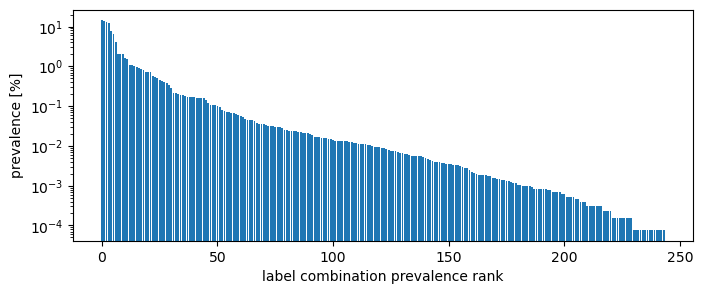

In [62]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.bar(range(len(label_counts)), label_counts.values)
ax.set_yscale("log")
ax.set_ylabel("prevalence [%]")
ax.set_xlabel("label combination prevalence rank")

In [63]:
label_counts[0:13]

no-opin-neutral_unint-neutral_unint-          14.492458
no-construct-neutral_unint-neutral_unint-     14.017218
no-other_new-neutral_unint-neutral_unint-     12.973740
no-leave_fact-out-out_negative-               12.429264
no-opin-in_both-in_both_positive-              7.763564
no-opin-out-out_negative-                      6.628607
yes-leave_fact-out-out_negative-inst           4.082431
no-opin-neutral_unint-in_both_positive-        2.090220
yes-leave_fact-out-out_negative-vulnerable     2.088398
no-opin-neutral_unint-out_negative-            1.994109
no-construct-out-out_negative-                 1.627127
yes-leave_fact-out-out_negative-left-wing      1.543542
no-opin-in_both-out_negative-                  1.107020
Name: combined_label, dtype: float64